In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

# 7.

In [8]:
# DATA GENERATOR
dim = 9
def data_generator (seed,n ,dim ) :
    mu1 = [1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 ]
    mu2 = [0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 ]
    mu3 = [0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 ]
    
    sigma1 = np.diag ( [1 , 1 , 1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ] )
    sigma2 = np.diag ( [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 1 , 1 , 1 ] )
    sigma3 = np.diag ( [ 0.1 , 0.1 , 0.1 , 1 , 1 , 1 , 0.1 , 0.1 , 0.1 ] )
    np.random.seed( seed )
    rand_int = np.random.choice ( [1 , 2 , 3 ] , size = n )
    unique_values , counts = np.unique ( rand_int , return_counts = True )
    datapoints = np.zeros (( 0 , dim ) )
    labels = np.array ( [ ] )
    for i , ( uv , mu , sigma ) in enumerate ( zip ( unique_values , [ mu1 , mu2 , mu3 ] , [sigma1 , sigma2 , sigma3 ] ) ) :
        datapoints = np.vstack (( datapoints , np.random.multivariate_normal ( mu ,sigma , size = counts [ i ] ) ) )
        labels = np.hstack (( labels , uv * np.ones ( counts [ i ] ) ) )
    shuff = np.random.permutation ( len ( labels ) )
    return datapoints [ shuff ] , labels [ shuff ]

## a)

In [16]:
n_values = [100, 200, 300, 400, 500]
n_runs = 100

mean_ari = []
std_ari = []

for n in n_values:
    ari_scores = []
    for seed in range(1, n_runs + 1):
        X, y_true = data_generator(seed, n, dim=9)

        kmeans = KMeans(n_clusters=3, n_init=10, random_state=seed)
        y_pred = kmeans.fit_predict(X)

        ari = adjusted_rand_score(y_true, y_pred)
        ari_scores.append(ari)

    mean_ari.append(np.mean(ari_scores))
    std_ari.append(np.std(ari_scores))

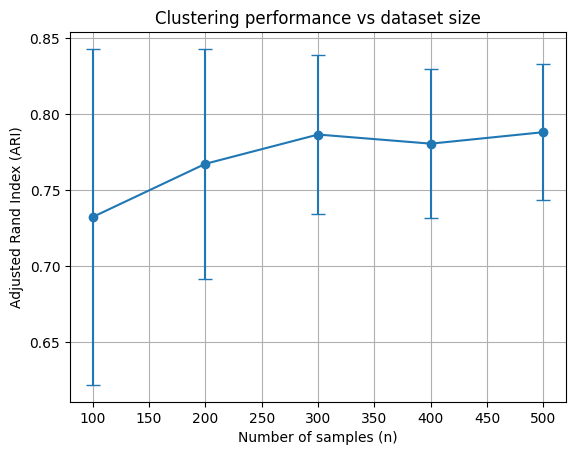

In [18]:
plt.errorbar(n_values, mean_ari, yerr=std_ari, fmt='-o', capsize=5)
plt.xlabel("Number of samples (n)")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("Clustering performance vs dataset size")
plt.grid(True)
plt.show()

## b)

In [26]:
mean_ari_pca = []
std_ari_pca = []

for n in n_values:
    ari_scores = []
    for seed in range(1, n_runs + 1):
        X, y_true = data_generator(seed, n, dim=9)

        # --- Project to 3 principal components ---
        X_proj = PCA(n_components=3, random_state=seed).fit_transform(X)

        # --- Lloyd’s algorithm on projected data ---
        kmeans = KMeans(n_clusters=3, n_init=10, random_state=seed)
        y_pred = kmeans.fit_predict(X_proj)

        ari = adjusted_rand_score(y_true, y_pred)
        ari_scores.append(ari)

    mean_ari_pca.append(np.mean(ari_scores))
    std_ari_pca.append(np.std(ari_scores))

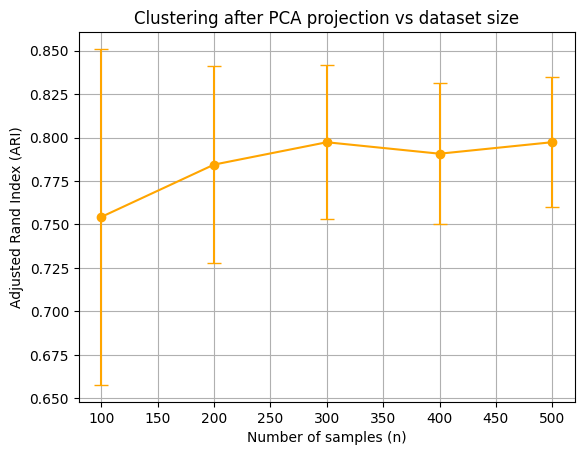

In [28]:
plt.errorbar(n_values, mean_ari_pca, yerr=std_ari_pca, fmt='-o', capsize=5, color="orange")
plt.xlabel("Number of samples (n)")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("Clustering after PCA projection vs dataset size")
plt.grid(True)
plt.show()

## c)

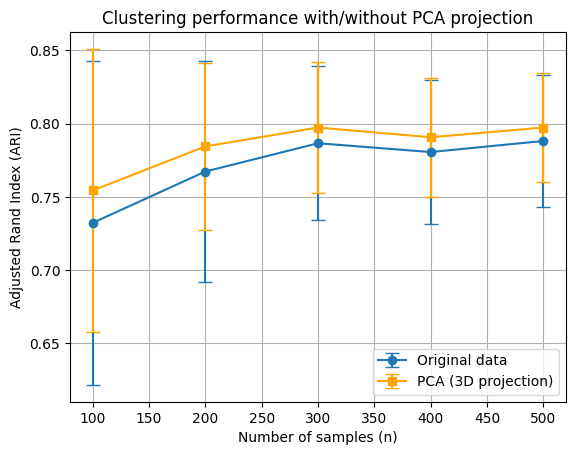

In [31]:
plt.errorbar(n_values, mean_ari, yerr=std_ari, fmt='-o', capsize=5, label="Original data")
plt.errorbar(n_values, mean_ari_pca, yerr=std_ari_pca, fmt='-s', capsize=5, label="PCA (3D projection)", color="orange")

plt.xlabel("Number of samples (n)")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("Clustering performance with/without PCA projection")
plt.legend()
plt.grid(True)
plt.show()

# 8.

In [60]:
from sklearn.cluster import MeanShift, KMeans , estimate_bandwidth, SpectralClustering

In [44]:
import random
import math
random.seed(0)
# # Data set 1

X1 = [ ]
for i in range (1000):
    theta = random.uniform (0, 2 * math.pi )
    radius = random.gauss (0 , 0.2 ) + random.choice ( [1 , 3 ] )
    X1.append ( [ radius * math . cos ( theta ) , radius * math.sin( theta ) ] )
X1 = np.array ( X1 )

# # Data Set 2
X2 = [ ]
for i in range (1000):
    theta = random.uniform (0, 2 * math . pi )
    radius = random.gauss (0 , 0.1) + 2

    if theta < math.pi :
        X2.append ( [ radius * math.cos ( theta ) -1 , radius * math.sin ( theta ) ] )
    else :
        X2.append ( [ radius * math.cos ( theta ) +1 , radius * math.sin ( theta ) ] )
X2 = np.array (X2)

# # Data Set 3
X3 = [ ]
for i in range ( 1000 ) :
    radius = random.gauss (0 , 1 )
    theta = random.uniform (0 , 2 * math . pi )
    center = random.choice ( [ [0 , 1 ] ,[3 , 3 ] ,[1 , - 3 ] ] )
    X3.append ( [ radius * math.cos ( theta ) + center [ 0 ] , radius * math.sin ( theta ) + center[ 1 ] ] )
X3 = np.array ( X3 )

In [77]:
datasets = [(X1, 2, "Dataset 1 (circles)"),
            (X2, 2, "Dataset 2 (moons)"),
            (X3, 3, "Dataset 3 (blobs)")]

def plot_clusters(X, labels, title):
    plt.figure(figsize=(5,5))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=10)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title(title)
    plt.show()

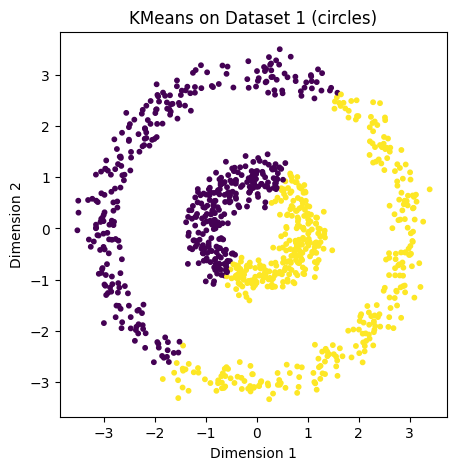

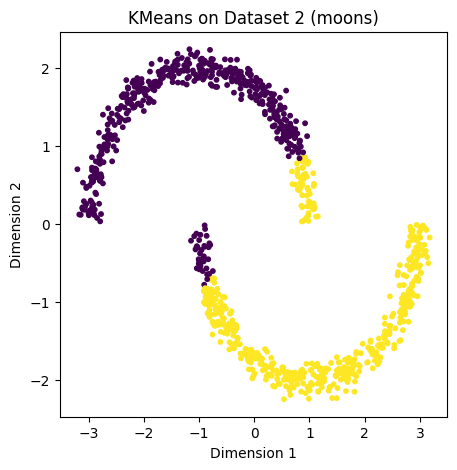

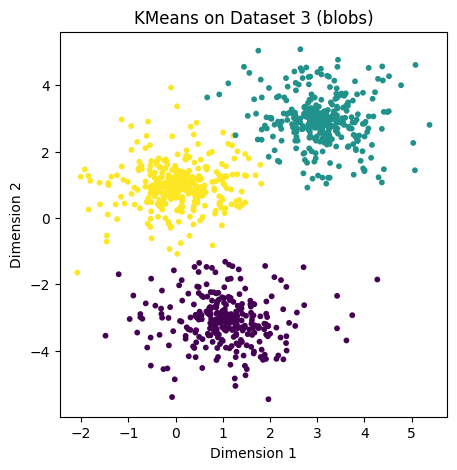

In [79]:
#Kmeans
for X, k, title in datasets:
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = km.fit_predict(X)
    plot_clusters(X, labels, f"KMeans on {title}")

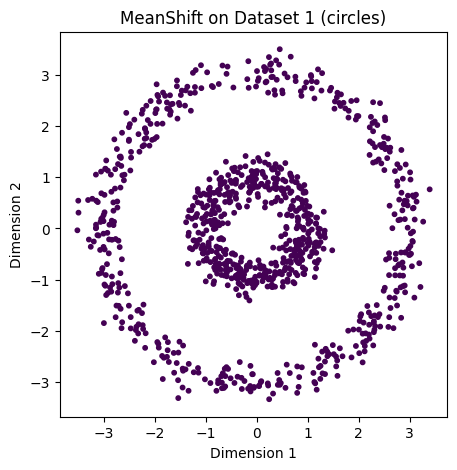

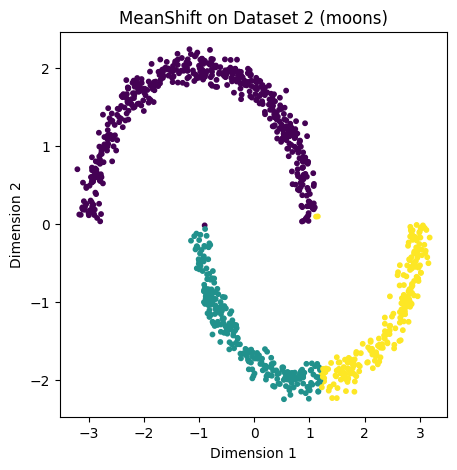

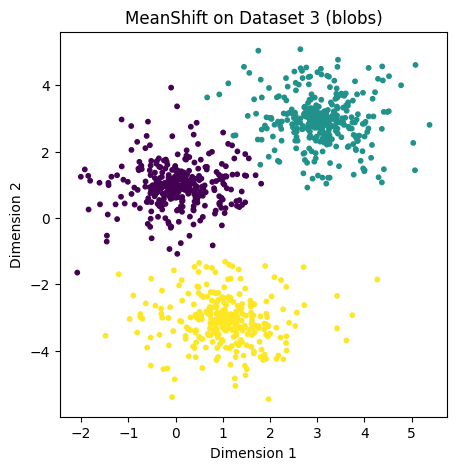

In [68]:
#Meanshift
for X, k, title in datasets:
    bandwidth = estimate_bandwidth(X, quantile=0.2)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    labels = ms.fit_predict(X)
    plot_clusters(X, labels, f"MeanShift on {title}")

/Users/kei/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


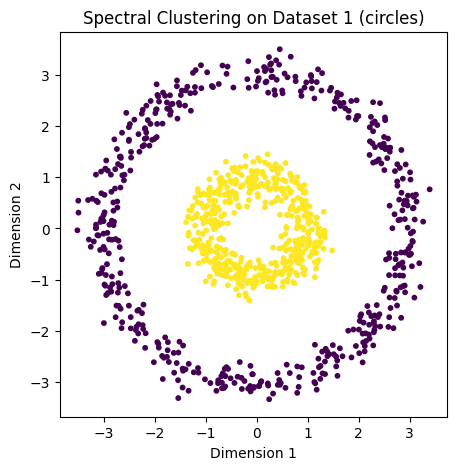

/Users/kei/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


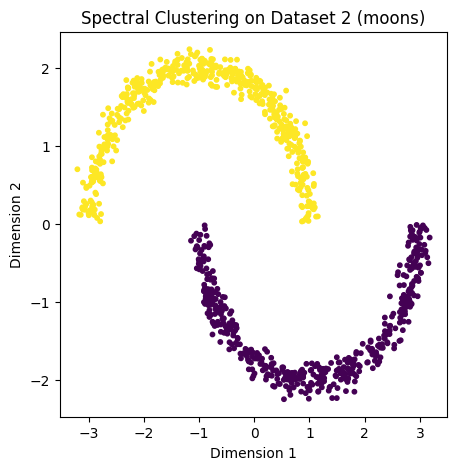

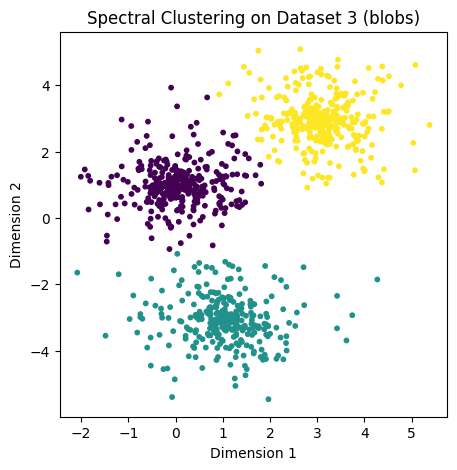

In [70]:
#Spectral
for X, k, title in datasets:
    sc = SpectralClustering(n_clusters=k, affinity="nearest_neighbors", assign_labels="kmeans", random_state=0)
    labels = sc.fit_predict(X)
    plot_clusters(X, labels, f"Spectral Clustering on {title}")